In [1]:
import pandas as pd
import numpy as np


import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold


import time
init_time = time.time()

from utils import data_handler, plotter, others

np.random.seed(3)

# Data Handling

In [2]:
task = 0
title = 'mos2_'

X,Y = data_handler.load_XY(task)
feature_list = X.columns

loading MoS2 dataset...


# ROC Plot

loading MoS2 dataset...
progress >>  0  /  10
progress >>  1  /  10
progress >>  2  /  10
progress >>  3  /  10
progress >>  4  /  10
progress >>  5  /  10
progress >>  6  /  10
progress >>  7  /  10
progress >>  8  /  10
progress >>  9  /  10


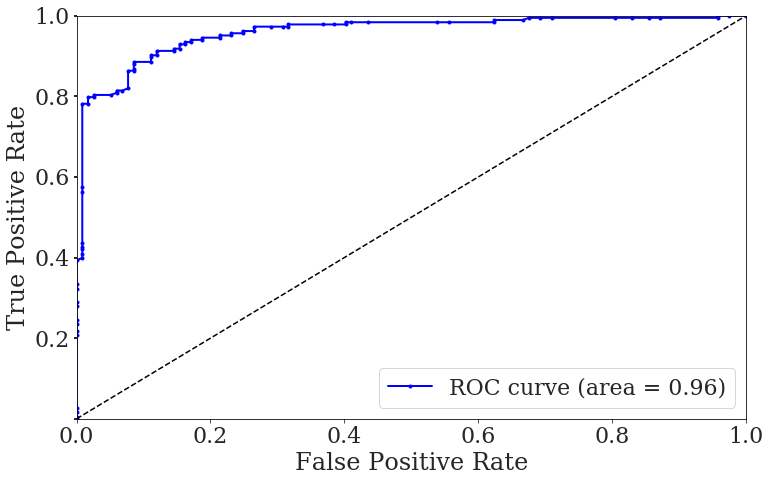

Successfully saved : F:\projects\MoS2_Project_clean/results/mos2__ROC_curve2019_6_10_2.csv


True

In [4]:
# GradientBoost
pipe = xgb.XGBClassifier(objective="binary:logistic",min_child_weight=1,**{'tree_method':'exact'},silent=True,n_jobs=4,random_state=3,seed=3);

tuned_parameters = dict(learning_rate=[0.01],#0.01,0.1,0.2,0.3
                        colsample_bylevel=[0.9],
                        colsample_bytree=[0.9],
                  n_estimators=[500], #100
                  gamma=[0.8], #0,0.1,0.2,0.3,0.4
                  max_depth =[11], # [4,5,6]
                       # reg_alpha = [0.1],
                  reg_lambda = [0.8],
                       subsample=[0.4])

plotter.plot_ROC_curve(pipe=pipe, tuned_parameters = tuned_parameters, title = title, save_csv = True)

# Best Model 

In [5]:
xgb_clf = xgb.XGBClassifier(objective="binary:logistic",min_child_weight=1,**{'tree_method':'exact'},silent=True,n_jobs=4,random_state=3,seed=3,
                         learning_rate=0.01,
                          colsample_bylevel=0.9,
                          colsample_bytree=0.9,
                          n_estimators=500, 
                          gamma=0.8, 
                          max_depth =11, 
                          reg_lambda = 0.8,
                          subsample=0.4)


xgb_clf.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0.8, learning_rate=0.01,
       max_delta_step=0, max_depth=11, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=3, reg_alpha=0,
       reg_lambda=0.8, scale_pos_weight=1, seed=3, silent=True,
       subsample=0.4, tree_method='exact')

## Feature Importance of the model learns all information
 - explain the model's predictions using SHAP values

Feature importance...


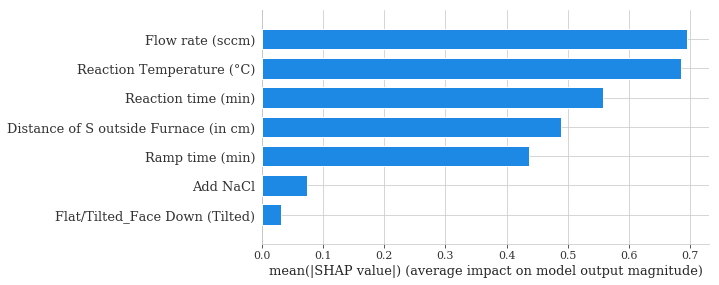

   Flow rate (sccm)  Reaction Temperature (°C)  Reaction time (min)  \
0          0.234496                   0.230779             0.188004   

   Distance of S outside Furnace (in cm)  Ramp time (min)  Add NaCl  \
0                               0.164703         0.147158  0.024484   

   Flat/Tilted_Face Down (Tilted)  
0                        0.010375  
Successfully saved : F:\projects\MoS2_Project_clean/results/mos2_feature_imp_sorted2019_6_10_3.csv


In [6]:
others.extract_feature_importance(xgb_clf, X, title)

# Self-generated fake inputs 

Predict generated inputs

In [7]:
others.predict_fake_input(xgb_clf, task, title)

Number of generated conditions :  (52920, 7)
Successfully saved : F:\projects\MoS2_Project_clean/results/mos2_pred_fake_input2019_6_10_3.csv


In [ ]:
end_time = time.time()
print('total time = ',(end_time - init_time)/60,' mins')